# Multiple Gravity Assist (MGA)

In this tutorial, we show the use of the {class}`pykep.trajopt.mga` to design an interplanetary trajectory through multiple planetary encounters, 
allowing for propulsion manovures in the form of instantaneous $\Delta V$ immediately after each fly-by.



In [1]:
import pykep as pk
import pygmo as pg
import matplotlib.pyplot as plt

In [2]:
earth = pk.planet(pk.udpla.jpl_lp("earth"))
venus = pk.planet(pk.udpla.jpl_lp("venus"))
udp = pk.trajopt.mga(
    seq=[
        earth,
        venus,
        earth,
        venus,
        earth
    ],
    tof_encoding = "direct",
    t0=[0, 1000],
    tof=[[30, 200], [30, 300], [30, 300], [30, 300]],
    vinf=2.5,
)

In [3]:
prob = pg.problem(udp)
uda = pg.cmaes(1500, force_bounds=True, sigma0=0.5, ftol=1e-4)
# uda = pg.sade(4500)
algo = pg.algorithm(uda)
res = list()
for i in range(1):
    pop = pg.population(prob, 100)
    pop = algo.evolve(pop)
    res.append(pop.champion_f)
    print(i, flush=True)

0


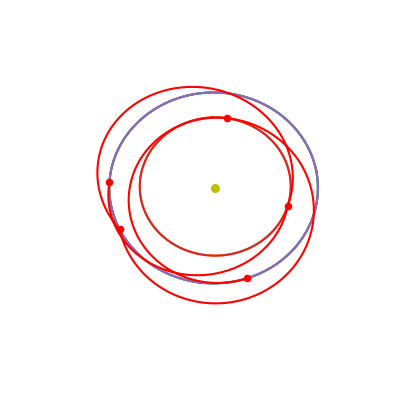

In [6]:
ax = udp.plot(pop.champion_x, figsize=(5, 5), N=500)
ax.view_init(90, 0)
ax.axis("off");

(-1.2176827620115955,
 1.423795515464508,
 -1.280132096084196,
 1.1369214963254848,
 -0.1352995534223377,
 0.05462886550415741)

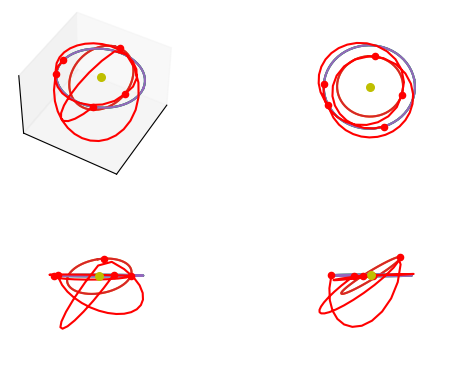

In [7]:
fig = plt.figure()

ax = fig.add_subplot(2, 2, 1, projection="3d")
ax = udp.plot(pop.champion_x, ax=ax)
ax.view_init(45, 30)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.get_zaxis().set_ticks([])

ax = fig.add_subplot(2, 2, 2, projection="3d")
ax = udp.plot(pop.champion_x, ax=ax)
ax.view_init(90, 0)
ax.axis("off")

ax = fig.add_subplot(2, 2, 3, projection="3d")
ax = udp.plot(pop.champion_x, ax=ax)
ax.view_init(0, 0)
ax.axis("off")

ax = fig.add_subplot(2, 2, 4, projection="3d")
ax = udp.plot(pop.champion_x, ax=ax)
ax.view_init(0, 90)
ax.axis("off")